In [27]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import JSON
from calendar import monthrange

import config as cfg


In [39]:
# get weather data for a particular city from startdate to enddate
def get_wwo_weather(city, startdate, enddate):
    params = {'q':city,
              'date': startdate,
              # 'enddate': enddate, 
              'tp':24, 
              'format': 'json',
              'key': cfg.WEATHER_KEY
             }
    url = "https://api.worldweatheronline.com/premium/v1/past-weather.ashx"

    response = requests.get(url=url, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print(response.text)
        raise
        

In [148]:
response = get_wwo_weather('Abbotsford', '2021-12-01', '2021-12-15')

{ "data": { "error": [ {"msg": "API key has reached calls per day allowed limit." } ] }}


RuntimeError: No active exception to reraise

In [6]:
JSON(response)

<IPython.core.display.JSON object>

In [7]:
def parse_json_weather(response):
    """ Parses response from wwo_get_weather(). 
        Returns df with hourly weather from all dates in the the response """
    
    dates = range(len(response['data']['weather']))
    rows = []
    
    for index in dates:
        date = response['data']['weather'][index]['date']
        maxtempC = response['data']['weather'][index]['maxtempC']
        mintempC = response['data']['weather'][index]['mintempC']
        avgtempC = response['data']['weather'][index]['mintempC']
        precip = response['data']['weather'][index]['hourly'][0]['precipMM']
        totalSnow_cm = response['data']['weather'][index]['totalSnow_cm']
        rows.append({'date': date, 
                    'maxtempC': maxtempC,
                    'mintempC': mintempC,
                    'avgtempC': avgtempC,
                    'precip': precip,
                    'totalSnow_cm': totalSnow_cm} )                              
        
    parsed_weather_df = pd.DataFrame(rows)
    return parsed_weather_df

In [8]:
parse_json_weather(response)

KeyError: 'weather'

In [9]:
def get_weather_data(start_year, cities):
    year = start_year
    df = pd.DataFrame()
    for city in cities:
        while year < 2021:
            months = [f'{i:02}'for i in range(1,13)]
            for month in months:
                start_date = f'{year}-{month}-01'
                end_date = f'{year}-{month}-{monthrange(int(year), int(month))[1]}' 
                try:
                    response_json = get_wwo_weather(city, start_date, end_date)
                    temp_df = parse_json_weather(response_json)
                    df = pd.concat([df, temp_df])
                except:
                    print('got error')
                    print(year, month)
                print(year, month)
            year += 1
    return df

In [10]:
df = get_weather_data(2008, ['Abbotsford'])

got error
2008 01
2008 01
got error
2008 02
2008 02
got error
2008 03
2008 03
got error
2008 04
2008 04
got error
2008 05
2008 05
got error
2008 06
2008 06
2008 07
2008 08
2008 09
2008 10
2008 11
2008 12
2009 01
2009 02
2009 03
2009 04
2009 05
2009 06
2009 07
2009 08
2009 09
2009 10
2009 11
2009 12


In [112]:
# Save dataframe
df = df.set_index('date')
df.to_csv('abbotsford_weather.csv', mode='a')

In [113]:
# load dataframe from file
df = pd.read_csv('abbotsford_weather.csv', parse_dates=['date'])


In [73]:
# Group by month and sum
grouped = df.groupby(pd.Grouper(key='date', freq='M')).sum()

<AxesSubplot:title={'center':'Abbotsford Monthly Total Precipitation'}, xlabel='date'>

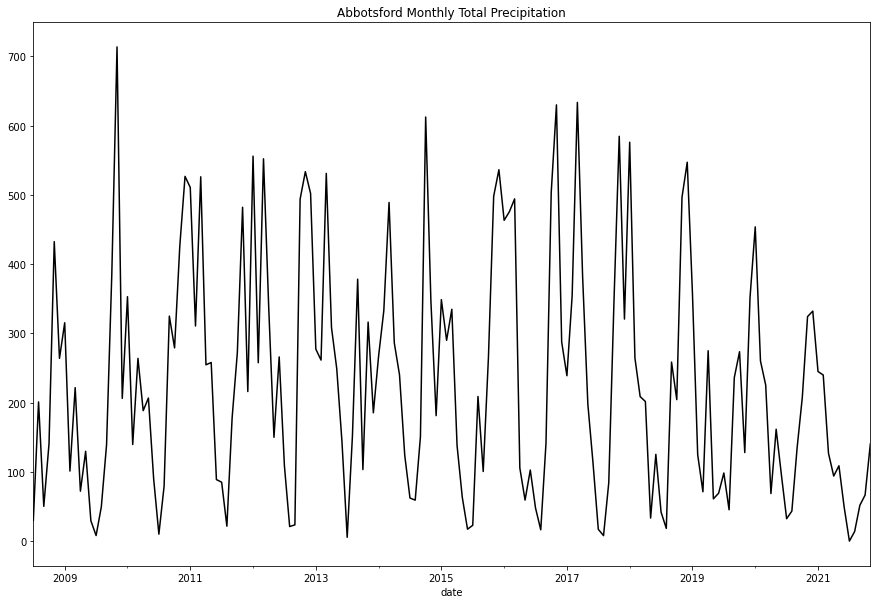

In [84]:
grouped['precip'].plot(title='Abbotsford Monthly Total Precipitation',
                       style='k-',
                      figsize=(15,10))

In [114]:
df = df.set_index('date')

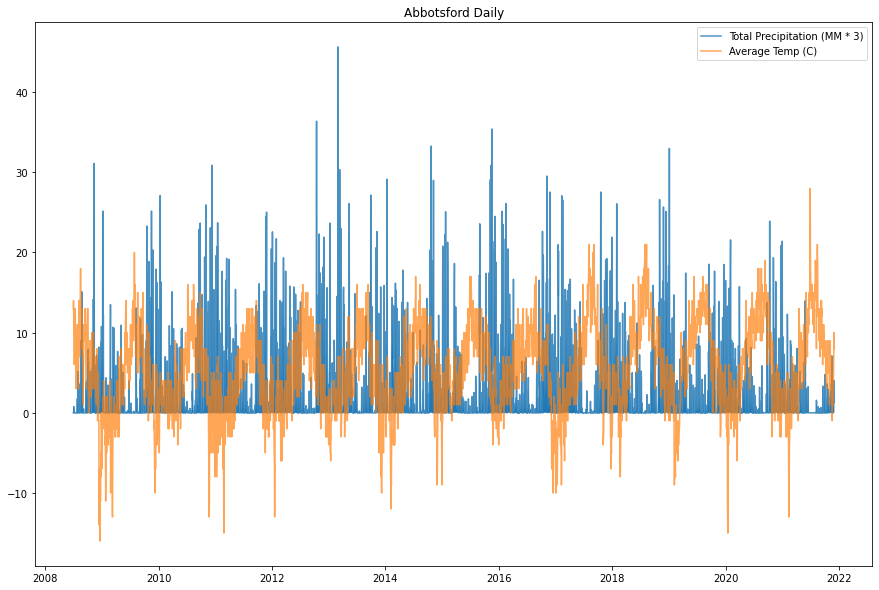

In [146]:
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(df['precip']/3, label='Total Precipitation (MM * 3)', alpha=0.8 )
ax.fill_between(df.index, df['precip']/3)
ax.plot(df['avgtempC'], label='Average Temp (C)', alpha=0.7)
ax.set_title('Abbotsford Daily')
plt.legend()
plt.show()


In [147]:
plt.savefig('AbbotsfordDaily')

<Figure size 432x288 with 0 Axes>